# GRIP Technology Tasks: 2  
           
             
                   

#                   SUPERVISED MACHINE LEARNING   

# IMPORTING LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# LOADING DATA 

In [2]:
Data=pd.read_csv("D:\The Spark Foundation\student_scores - student_scores.csv")

# DISCOVERING DATA

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
Data.shape

(25, 2)

In [5]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#checking Null values
Data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# DATA VISUALIZATION

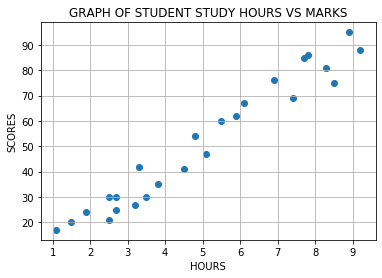

In [7]:
plt.scatter( x=Data.Hours, y=Data.Scores)
plt.xlabel("HOURS")
plt.ylabel("SCORES")
plt.title("GRAPH OF STUDENT STUDY HOURS VS MARKS")
plt.grid(True)

 ## Prepare the data for Machine Learning algorithms 
 Data Data Spliting

In [9]:
X = Data.drop("Scores", axis = "columns")
y = Data.drop("Hours", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (25, 1)
shape of y =  (25, 1)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (20, 1)
shape of y_train =  (20, 1)
shape of X_test =  (5, 1)
shape of y_test =  (5, 1)


# Selecting Model for Train

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [13]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
lr.coef_

array([[9.56433743]])

In [15]:
lr.intercept_

array([2.70197068])

In [16]:
lr.predict([[4]])[0][0].round(2)

40.96

In [21]:
y_pred  = lr.predict(X_test)
y_pred

array([[55.30582657],
       [76.34736893],
       [68.69589898],
       [82.08597139],
       [28.52568176]])

In [22]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,5.5,60.0,55.305827
1,7.7,85.0,76.347369
2,6.9,76.0,68.695899
3,8.3,81.0,82.085971
4,2.7,30.0,28.525682


# Fine-tune your model

In [24]:
lr.score(X_test,y_test)

0.9238518102278781

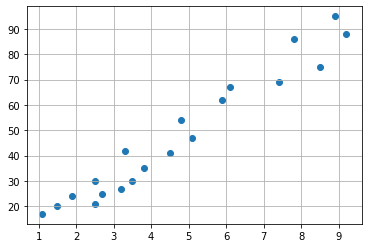

In [26]:
plt.scatter(X_train,y_train)
plt.grid(True)

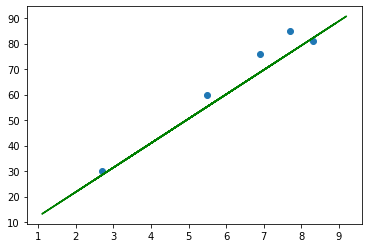

In [36]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "g")

## What will be predicted score if a student study for 9.25 hrs in a day?

In [41]:
lr.predict([[9.25]])[0][0]

91.17209195439372